# N-Gaussians  

In [3]:
import torch
import matplotlib.pyplot as plt

from markov_bridges.configs.config_classes.generative_models.cfm_config import CFMConfig
from markov_bridges.configs.config_classes.data.basics_configs import GaussiansConfig
from markov_bridges.configs.config_classes.trainers.trainer_config import CFMTrainerConfig
from markov_bridges.configs.config_classes.networks.continuous_network_config import DeepMLPConfig
from markov_bridges.configs.config_classes.pipelines.pipeline_configs import CFMPipelineConfig
from markov_bridges.utils.experiment_files import ExperimentFiles
from markov_bridges.models.generative_models.cfm_lightning import CFML

model_config = CFMConfig()
model_config.data = GaussiansConfig(target_continuous_type="Ngaussian", 
                                    number_of_gaussians=4,
                                    has_context_discrete=True,
                                    has_target_discrete=False,
                                    batch_size=128,
                                    total_data_size=66000,
                                    train_data_size=60000,
                                    test_data_size=6000,)

model_config.continuous_network = DeepMLPConfig(time_embed_dim=16, dropout=0.0)

model_config.trainer = CFMTrainerConfig(number_of_epochs=10, 
                                        debug=False, 
                                        learning_rate=1e-4)
model_config.trainer.device = "cuda:0"
model_config.trainer.paralellize_gpu = False
model_config.trainer.metrics = []
model_config.thermostat.gamma = 0.01
model_config.pipeline = CFMPipelineConfig(number_of_steps=200)
model_config.pipeline.ode_solver = "euler"


experiment_files = ExperimentFiles(experiment_name="cfm",
                                    experiment_type="gauss",
                                    experiment_indentifier="lightning_test1",
                                    delete=True)

cfm = CFML(model_config, experiment_files=experiment_files)
cfm.train()

KeyError: 'ipython_dir'

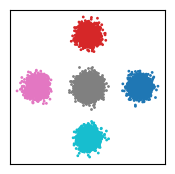

In [2]:
from markov_bridges.data.gaussians2D_dataloaders import GaussiansDataloader

dataloader = GaussiansDataloader(model_config.data)
data = dataloader.get_data_sample(sample_size=8000, train=True)

plt.figure(figsize=(2, 2))
plt.scatter(data.source_continuous[:, 0], data.source_continuous[:, 1], s=1, c='gray', label="source")
plt.scatter(data.target_continuous[:, 0], data.target_continuous[:, 1], s=1, c=data.context_discrete, cmap="tab10", label="target")
plt.xticks([])
plt.yticks([])
plt.axis('equal')
# plt.legend()
plt.show()

In [3]:
experiment_files = ExperimentFiles(experiment_name="cfm_context", experiment_type="Ngaussians") 
trainer = CFMTrainer(config=model_config, experiment_files=experiment_files)
trainer.train()

# ==================================================
# START OF TRAINING 
# ==================================================
# Current Model ************************************
Ngaussians
cfm_context
None
# ==================================================
# Number of Epochs 10
# ==================================================


Epoch 1, Loss: 0.0197:   0%|          | 0/10 [00:13<?, ?it/s]


KeyboardInterrupt: 

In [6]:
from markov_bridges.models.generative_models.cfm import CFM
from markov_bridges.data.gaussians2D_dataloaders import GaussiansDataloader

path = '/home/df630/markov_bridges/results/cfm_context/Ngaussians/1722627793'

cfm = CFM(experiment_dir=path)
dataloader = GaussiansDataloader(model_config.data)

trajectories = []
context_discrete = []

for databatch in dataloader.test():
    sample = cfm.pipeline.generate_sample(databatch, return_path=True)
    trajectories.append(sample.trajectories.detach().cpu())
    context_discrete.append(sample.context_discrete.detach().cpu())

trajectories = torch.cat(trajectories, dim=0)
context_discrete = torch.cat(context_discrete, dim=0)


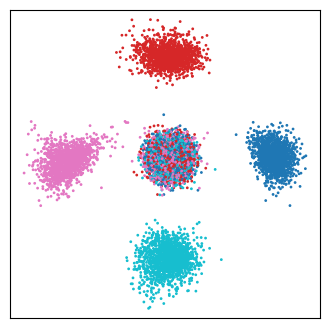

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.scatter(trajectories[:,0,0], trajectories[:,0,1], s=1, c=context_discrete, cmap="tab10")
plt.scatter(trajectories[:,-1,0], trajectories[:,-1,1],  s=1, c=context_discrete, cmap="tab10")
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.show()